In [4]:
# !pip install verifyml
# !pip install tempeh


In [5]:
import pandas as pd
import numpy as np
from tempeh.configurations import datasets

import verifyml.model_card_toolkit as mctlib
import verifyml.model_tests.utils as utils
import seaborn as sns
import uuid

from datetime import date
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve


compas_dataset = datasets["compas"]()
X_train, X_test = compas_dataset.get_X(format=pd.DataFrame)
y_train, y_test = compas_dataset.get_y(format=pd.Series)
(
    sensitive_features_train,
    sensitive_features_test,
) = compas_dataset.get_sensitive_features("race", format=pd.Series)
# X_train.loc[0], y_train[0]

In [3]:
X_test['age']

0       49.640495
1       57.000000
2       49.000000
3       47.000000
4       39.000000
          ...    
1737    54.934433
1738    21.000000
1739    24.000000
1740    30.000000
1741    29.778069
Name: age, Length: 1742, dtype: float64

In [ ]:
# url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
# df = pd.read_csv(url)

In [ ]:
# cancer = load_breast_cancer()

# X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# y = pd.Series(cancer.target)

# X_train, X_test, y_train, y_test = train_test_split(X, y)


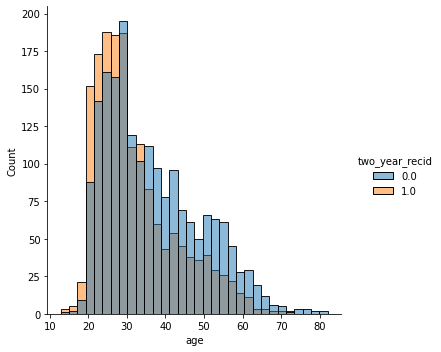

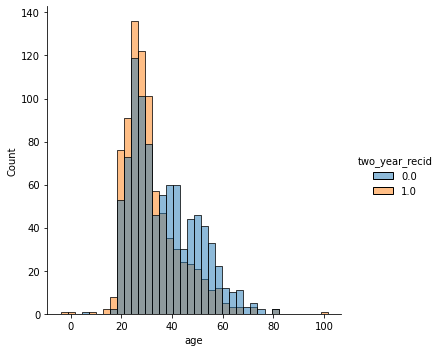

In [ ]:

# utils.plot_to_str() converts the plot to a base-64 encoded string that the model card will accept

sns.displot(x=X_train['age'], hue=y_train)
mean_radius_train = utils.plot_to_str()

sns.displot(x=X_test['age'], hue=y_test)
mean_radius_test = utils.plot_to_str()



Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


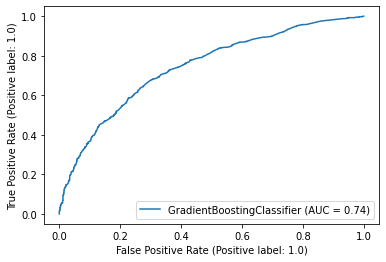

In [ ]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

# Plot an ROC curve
plot_roc_curve(clf, X_test, y_test)
roc_curve = utils.plot_to_str()




In [ ]:

mct = mctlib.ModelCardToolkit(
    output_dir='model_card_output', # directory that the model card output will be saved to
    file_name='first_model_card'    # file name of the model card that will be created
)

# init model card assets using the toolkit
model_card = mct.scaffold_assets()


In [ ]:
import verifyml.model_card_toolkit as mctlib

# Initialize the Model Card Toolkit with a path to store generate assets
mct = mctlib.ModelCardToolkit(output_dir="model_card_output", file_name="breast_cancer_diagnostic_model_card")
model_card = mct.scaffold_assets()

In [ ]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0
